<a href="https://colab.research.google.com/github/carvalheiracarlos/deep_leaning_notebooks/blob/main/imdb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.imdb.load_data()

In [3]:
'''
Probably need to merge this X_train and X_test, 
than partition again in some better proportion(train: 80% | test: 20%).

Fill review arrarys with zeros to have same lenght.
'''
print(f'Train Sets Shapes.....X_train: {X_train.shape}')
print(f'Train Sets Shapes.....y_train: {y_train.shape}')
print(f'Train Sets Largest Review Size: {max([max(review) for review in X_train])}')
print(f'Tests Sets Shapes.....X_test: {X_test.shape}')
print(f'Tests Sets Shapes.....y_test: {y_test.shape}')
print(f'Train Sets Largest Review Size: {max([max(review) for review in X_test])}')

Train Sets Shapes.....X_train: (25000,)
Train Sets Shapes.....y_train: (25000,)
Train Sets Largest Review Size: 88586
Tests Sets Shapes.....X_test: (25000,)
Tests Sets Shapes.....y_test: (25000,)
Train Sets Largest Review Size: 88584


In [4]:
X = np.concatenate((X_train, X_test), axis=0)
y = X = np.concatenate((y_train, y_test), axis=0)

print(f'All Data Shape.......X: {X.shape}')
print(f'All labels Shape.....y: {y.shape}')

All Data Shape.......X: (50000,)
All labels Shape.....y: (50000,)


In [5]:
# Thanks to https://github.com/kashif/tf-keras-tutorial/blob/tf2/3-imdb.ipynb
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension), dtype=np.float32)
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

X = vectorize_sequences(X)

In [7]:
# Thanks to https://github.com/kashif/tf-keras-tutorial/blob/tf2/3-imdb.ipynb
y = np.reshape(np.asarray(y, dtype=np.float32), (len(y), 1))

In [10]:
print(f'Data Shape after Vectorize......: {X.shape}')
print(f'Lables Shape after reshape.......: {y_train.shape}')

Data Shape after Vectorize......: (50000, 10000)
Lables Shape after reshape.......: (25000,)


In [11]:
'''
partition_size: size based on Lenght on X_train
                to divide validation and train sets on proportion of ~ 20% - 80%
'''

partition_size = int(len(X_train) * 0.2)
test_reviews, test_labels = X[:partition_size], y[:partition_size]
train_reviews, train_labels = X[partition_size:], y[partition_size:]
validation_reviews, validation_labels = train_reviews[:partition_size], train_labels[:partition_size]


print(f'Train Sets: {train_reviews.shape}, {train_labels.shape}')
print(f'Tests Sets: {test_reviews.shape}, {test_labels.shape}')
print(f'Validation Sets: {validation_reviews.shape}, {validation_labels.shape}')

Train Sets: (45000, 10000), (45000, 1)
Tests Sets: (5000, 10000), (5000, 1)
Validation Sets: (5000, 10000), (5000, 1)


In [13]:
class DenseNet:
  @staticmethod
  def build(input_shape, 
            n_classes, 
            activation='relu', 
            weights_path=None):

    model = tf.keras.models.Sequential()
    
    model.add(tf.keras.layers.Dense(64, activation=activation, input_shape=input_shape))
    model.add(tf.keras.layers.Dropout(0.2))

    model.add(tf.keras.layers.Dense(n_classes, activation='softmax'))

    # if a weights path is supplied (inicating that the model was
    # pre-trained), then load the weights
    if weights_path is not None:
      model.load_weights(weights_path)
    
    return model

In [12]:
n_epochs = 200
ini_learning_rate = 1e-3
batch_size=128

In [18]:
train_model = DenseNet.build(input_shape=(10000, ), 
                             n_classes=1, 
                             activation='relu', 
                             weights_path=None)

opt = tf.keras.optimizers.Adam(learning_rate=ini_learning_rate,
                            beta_1=0.9, 
                            beta_2=0.999, 
                            epsilon=1e-08,
                            decay=ini_learning_rate/n_epochs)

train_model.compile(loss='binary_crossentropy', 
                    optimizer=opt, 
                    metrics=[tf.keras.metrics.binary_accuracy])
train_model.summary()
tensorboard = tf.keras.callbacks.TensorBoard('./logs/fit/',
                                          write_images=True)

callbacks_list = [tensorboard]

fit_history = train_model.fit(x=train_reviews,
                              y=train_labels,
                              epochs=n_epochs,
                              validation_data=(validation_reviews, validation_labels),
                              validation_freq=1,
                              batch_size=batch_size,
                              callbacks=callbacks_list,
                              verbose=1)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 64)                640064    
                                                                 
 dropout_4 (Dropout)         (None, 64)                0         
                                                                 
 dense_9 (Dense)             (None, 1)                 65        
                                                                 
Total params: 640,129
Trainable params: 640,129
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
352/352 [==============================] - 6s 16ms/step - loss: 0.2424 - binary_accuracy: 0.4990 - val_loss: 0.0304 - val_binary_accuracy: 0.5014
Epoch 2/200
352/352 [==============================] - 5s 15ms/step - loss: 0.0157 - binary_accuracy: 0.4990 - val_loss: 0.0061 - val_binary_accuracy: 0.5

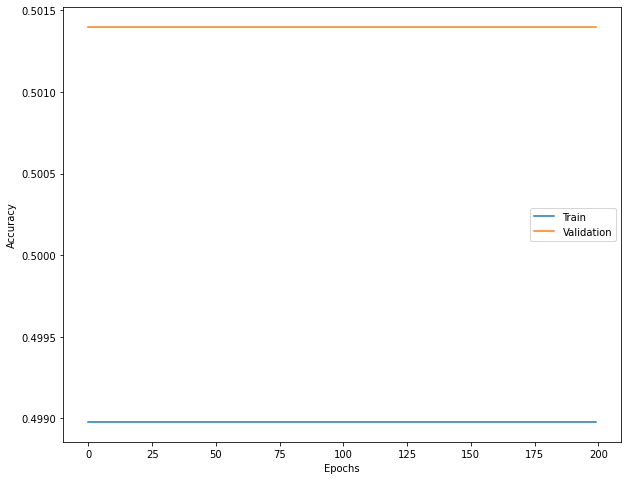

In [20]:
fig, ax = plt.subplots(figsize=(10, 8))
ax = plt.plot(fit_history.history['binary_accuracy'], label='Train')
ax = plt.plot(fit_history.history['val_binary_accuracy'], label='Validation')
ax = plt.xlabel('Epochs')
ax = plt.ylabel('Accuracy')
ax = plt.legend()

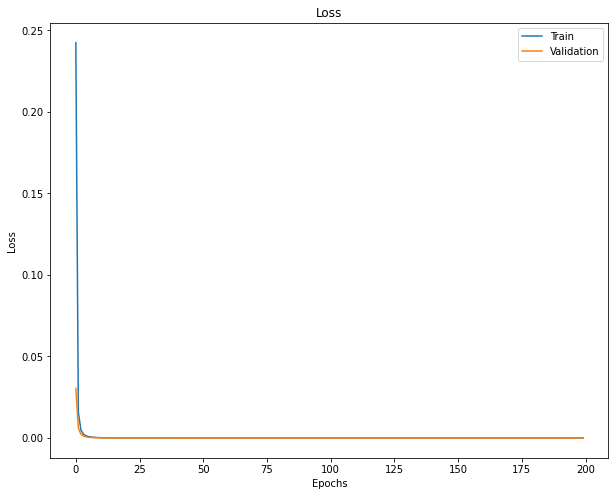

In [21]:
fig, ax = plt.subplots(figsize=(10, 8))
ax = plt.plot(fit_history.history['loss'], label='Train')
ax = plt.plot(fit_history.history['val_loss'], label='Validation')
ax = plt.xlabel('Epochs')
ax = plt.ylabel('Loss')
ax = plt.title('Loss')
ax = plt.legend()